# Image Classification: Introduction to Deep Learning

Deep Learning is the specific area of Machine Learning using Neural Networks.

Deep Learning has got some momentum thanks to the Big Data: a Deep Learning model usually needs more data than a regular Machine Learning one.

There are several types of Deep Learning architectures:
* Regular Neural Networks (or MLP)
* Convolutional Neural Networks
* Recurrent Neural Networks
* Generative Adversarial Networks
* ...

# I. Neural Networks

## I.1. Perceptron

The perceptron, which is the fundamental basis of almost all Deep Learning, was first proposed by Frank Rosenblatt, a Psychologist, in 1957.

He found his inspiration in the neuron:

![](images/neuron-illustration.jpg)

![](images/Perceptron_forward.png)

## I.2. Neural Network representation

Neural networks are usually represented on diagrams using a standard convention:
![](images/MLP_with_activations.png)

This diagram has to be read from left to right.

On the left, here in red, is the **input layer**: this is actually the input features $X=(x_1, x_2, x_3)$ (e.g. number of rooms in a house, presence of a garden...). The number of **units** is the number of input features.

On the right, in green, is the **output layer**: this is the prediction of target value (e.g. the house price in a regression, or the class in classification). The number of **units** depends on the task (for regression it is usually one, for multiclass classification the number of classes).

There is always one and only one input layer and output layer.

In the middle, in blue, are the **hidden layers**. There can be an arbitrary number of hidden layers. The hiddens layers also have an arbitrary number of **units**.



## I.3. Forward Propagation

Now that we understand the representation, we would understand how to compute the output predicted value, given input features $X = (x_1, x_2, ..., x_N)$.

To compute this output predicted value, we need to weights $W$ of each unit.

Each unit $i$ of a layer $l$ (except the input layer) has associated weights $W^{[l]}_i$. We will use those weights compute the activation $a^{[l]}_i$ of each unit.

Considering our example in diagram, we could compute the activations of the first hidden layer using the following formulas:

$$
a^{[1]}_{1} = W^{[1]}_{1} \times X + b^{[1]}_{1}
$$

$$
a^{[1]}_{2} = W^{[1]}_{2} \times X + b^{[1]}_{2}
$$

$$
a^{[1]}_{3} = W^{[1]}_{3} \times X + b^{[1]}_{3}
$$

$$
a^{[1]}_{4} = W^{[1]}_{4} \times X + b^{[1]}_{4}
$$

Where $b^{[1]}_{i}$ is called the bias, and i just an additional parameter.

Now if we want to compute the activations of the second hidden layer $a^{[2]}_i$, we would use the exact same formulas, but with the activations of the first hidden layer as input ($a^{[1]}_i$), instead of the input features:

$$
a^{[2]}_{1} = W^{[2]}_{1} \times a^{[1]} + b^{[2]}_{1}
$$

$$
a^{[2]}_{2} = W^{[2]}_{2} \times a^{[1]} + b^{[2]}_{2}
$$

$$
a^{[2]}_{3} = W^{[2]}_{3} \times a^{[1]} + b^{[2]}_{3}
$$

$$
a^{[2]}_{4} = W^{[2]}_{4} \times a^{[1]} + b^{[2]}_{4}
$$



Finally, to compute the output layer would be exactly the same:
$$
a^{[3]}_{1} = W^{[3]}_{1} \times a^{[2]} + b^{[3]}_{1}
$$



## I.4. Activation function

In Neural networks, usually there is one more step: the activation function, often called $g$.

Indeed, if we use the above formulas, the activation values $a^{[l]}_i$ have no boundaries: they could go up to ± infinity. Moreover, though less intuitive, activation functions add non-linearity to the MLP: without activation function, only linearly separable problems can be solved!

![](images/activation_purpose.png)

So the new formulas are almost the same:

$$
a^{[1]}_{1} = g(W^{[1]}_{1} \times X + b^{[1]}_{1}) = g(z^{[1]}_{1})
$$

$$
a^{[1]}_{2} = g(W^{[1]}_{2} \times X + b^{[1]}_{2}) = g(z^{[1]}_{2})
$$

$$
a^{[1]}_{3} = g(W^{[1]}_{3} \times X + b^{[1]}_{3}) = g(z^{[1]}_{3})
$$

$$
a^{[1]}_{4} = g(W^{[1]}_{4} \times X + b^{[1]}_{4}) = g(z^{[1]}_{4})
$$

And so on for the other layers.

## I.5. The main activation functions

There are five main activation functions: Sigmoid, Tanh, Softmax, Relu and Linear. We will make a review of them now.

**Sigmoid** is a historic activation function, but not the most efficient in general, now used mainly in last layer of a binary classification. The formula is the following:

$$ sigmoid(x) = \frac{1}{1+e^{-x}} $$

**Hyperbolic tangent (or tanh)** is quite similar to sigmoid function. The shape is close to the one of sigmoid, but ranges between -1 and 1, while sigmoid ranges between 0 and 1. This is has a symmetry that sigmoid does not.
This is not the most frequently used activation function at first approach anymore.

The formula of tanh is the following:
$$
tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$$

**Rectified linear unit (or relu)** is really different than sigmoid and tanh activations. Even though it looks odd at first sight, it has the advantage of avoiding the problem of vanishing gradient. It is currently one of the most widely used activation function.

The formula is the following:
$$
relu(x) = max(0, x)
$$

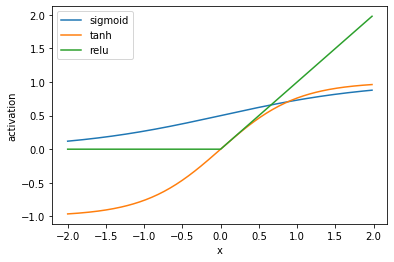

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-2, 2, 0.02)
sigmoid = 1./(1+np.exp(-x))
tanh = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
relu = np.max([np.zeros(len(x)), x], axis=0)
plt.plot(x, sigmoid)
plt.plot(x, tanh)
plt.plot(x, relu)

plt.xlabel('x')
plt.ylabel('activation')
plt.legend(['sigmoid', 'tanh', 'relu'])
plt.show()

**Softmax** function is a special activation function, used in only one specific case: the last layer of a multiclass classification.

**Linear** function is just the identity, and is used mainly in the specific case of last layer of a regression.

# II. Image Processing

## II.1 Image and Machine Learning

Images are just numbers! So all we learnt about Machine Learning has to work with images, both classification and regression!
![](images/computer_vision_task.png)

But unlike other kind of data, images have **spatial structure**! Indeed, the same object can be seen from various viewpoints, deformed, scaled, occluded, etc...

![](images/Computer_Vision_limits.png)

That's why in order to take full advantage of this spatial structure, we need in **add spatial information in our models**. This is where Convolutional Neural Networks (CNN) take place! So first, let's talk a bit about image processing.

## II.2 Padding

Paddind an image is adding borders to it, thus increasing the size of the image. Most of the time, images are padded with zeros.

Below is an example of a 4x4 image before padding, and after padding:

![](images/padding_image.png)

Padding can also add more than one line of zeros.

## II.3 Kernel

A kernel in image processing is nothing more than a small image (or a small matrix), that we will use to make a convolution.

Thus, a kernel is necessary smaller than the image. Usually, kernels have odd dimensions, and are quite small. Typical sizes of kernels are:
* 3x3
* 5x5
* 7x7
* 9x9

Depending on the values of the kernel, the convolution will provide different results.

## II.4 Convolution

A convolution is a mathematical operation that you already encountered. For example, below is the convolution result of an image with a 3x3 kernel of ones:

![](images/convolution_animated.gif)

But as you know, the kernel can have different values. Below is an example of a convolution of an image I with a non uniform kernel K:

![](images/convolution_kernel.png)

A wisely chosen kernel can be really useful to detect patterns in images. Here is a list of commonly used kernels and what they do on a given image (from [wikipedia](https://en.wikipedia.org/wiki/Kernel_(image_processing)):

| Kernel | Usage | Example |
|:--:|:--:|:--:|
| \begin{bmatrix}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0
\end{bmatrix}| Identity | ![](images/Vd-Orig.png)  |
|\begin{bmatrix}
\ \ 1 & 0 & -1 \\
\ \ 0 & 0 & \ \ 0 \\
-1 & 0 & \ \ 1
\end{bmatrix} | Edge detection | ![](images/Vd-Edge1.png)  |
| \begin{bmatrix}
0 &  \ \ 1 & 0 \\
1 & -4 & 1 \\
0 &  \ \ 1 & 0
\end{bmatrix}| Edge detection | ![](images/Vd-Edge2.png)  |
| \begin{bmatrix}
-1 &  -1 & -1 \\
-1 & \ \ 8 & -1 \\
-1 &  -1 & -1
\end{bmatrix}| Edge detection | ![](images/Vd-Edge3.png)  |
| \begin{bmatrix}
\ \ 0 & -1 & \ \ 0 \\
-1 & \ \ 5 & -1 \\
\ \ 0 & -1 & \ \ 0
\end{bmatrix}| Sharpening | ![](images/Vd-Sharp.png)  |
| \begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{bmatrix}| Gaussian blur | ![](images/Vd-Blur1.png)  |


So to summarize, a convolution is a mathematical operation on a image with a given kernel, resulting in a new processed image.

## II.5 Strides

Up to now, we know how to compute a convolution, with a given kernel, and to pad an image. The last tool needed is what is called stride.

The stride value is the step between two convolutions with a kernel. For the moment, all we did was with a stride of one, as in the example below:

![](images/Stride1.png)

So as we see in this example, an image of dimension 7x7, convoluted with a kernel of 3x3 results in an image of 5x5.

What if we use a stride of 2, meaning our kernel with use a step of 2 on our image:

![](images/Stride2.png)

With a stride of 2, an input image of dimension 7x7 convoluted with a kernel of 3x3 results in an image of 3x3.

# III. Convolutional Neural Networks

## III.1 Introduction

Why would we use convolutions in neural networks? Isn't a MLP complicated enough?

Well, indeed MLP are complicated enough, but they do not take into account *spatial* correlations. Indeed in an image, there are spatial correlations everywhere:
* In a face the eye is always close to the nose, and the nose is always in the middle of the face.
* A bike always has two wheels.
* All numbers and letters have a particular shape.

For all of those examples, a classical MLP will not see the spatial correlations, and might have to learn them by itself. But if you add convolutions, this is far more easier to understand the structure of the data for the neural network.

![](images/CNN_features_levels.png)

## III.2 Convolutional Layer

To make a CNN, we need first to make a Convolutional Layer. A convolutional layer is simply a convolution on our input data, with several options to choose: the size of the kernel, the padding and the stride. 

Here is the signature in TensorFlow:

```python
tensorflow.keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
```

With especially the following parameters to use:
* `filters`: the number of kernels to use
* `kernel_size`: the size of the kernels (e.g. `(3,3)` for a 3x3 kernel)
* `padding`: `valid` for no padding, `same` to keep the same dimensions for the image
* `kernel_regularizer`: to add regularization

We will see how to use it in an example in the last section.

## III.3 Pooling Layer

A pooling layer is a layer that will reduce the size of the images by taking the average or max value of a given number of pixels.

Below is an example of pooling layer, with a kernel of 2x2 and a stride of 2 applied on an image of 4x4:

![](images/max_pooling.jpeg)

A pooling layer is usually used right after a convolutional layer.

Pooling layers are defined in Keras as well, with the following signature:

`tensorflow.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

Where:
* `pool_size` is the dimensions of the kernel
* `strides` is the stride value, if `None` the value will be the same as `pool_size`
* `padding` can be `valid` for no padding or `same` for keeping image dimension

# IV. Application: LeNet-5 on MNIST digits

## IV.1 Architecture diagram

We will first see the architecture of the LeNet-5: this is the algorithm that was proposed by [LeCun et al.](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) for digit classification using convolutional networks.

![](images/Lenet5.png)

We will now decompose and explain the layers step by step:
* Input (32x32): this is the input image of a digit
* C1 (6@28x28): this is a convolutional layer of 3x3 with 6 filters
* S2 (6@14x14): this is a max pooling layer of 2x2
* C3 (16@10x10): this is a convolution layer of 3x3 with 10 filters
* S4 (16@5x5): this is a max pooling layer of 2x2
* C5 (120): this is a fully connected layer (MLP) of 120 units
* F6 (84): this is a fully connected layer (MLP) pf 84 units
* Output (10): this is a softmax layer of 10 units (1 units per digit)

## IV.2 Implementation

The implementation of the LeNet-5 algorithm would be the following in Keras:

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense


def lenet5():
    
    model = Sequential()

    # Layer C1
    model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
    # Layer S2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Layer C3
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
    # Layer S4
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Before going into layer C5, we flatten our units
    model.add(Flatten())
    # Layer C5
    model.add(Dense(units=120, activation='relu'))
    # Layer F6
    model.add(Dense(units=84, activation='relu'))
    # Output layer
    model.add(Dense(units=10, activation = 'softmax'))
    
    return model

You will soon get familiar with the classes of TensorFlow/Keras. Here we are using the following:
- `Sequential()`: this will contain all the layers of our neural network
- `Dense(units, activation=None)`: this is a classical multi layer perceptron, taking as input the number of units (i.e. Neurons) and the activation function
- `Conv2D(filters, kernel_size, activation)`: this is the convolutional layer
- `MaxPooling2D(pool_size)`: this is the pooling layer
- `Flatten()`: this is a layer that allows to go from 2D information to 1D information

> **NB:** the first layer of a `Sequential` model always takes as input the `input_shape`: this is the `shape` of your images! Otherwise TensorFlow does not know how many input features you have!

Finally, one can review a model with the `summary()` method:

In [3]:
my_model = lenet5()
my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

## IV.3 Model compilation

Then you have to compile your model: indeed TensorFlow does not fully work on Python, so a compilation step is necessary. In the compilation, you can provide several parameters.
* The optimizer is the optimization algorithm: you already know the gradient descent, you can call it by using `optimizer='adam`
* The loss function: for binary classification use `loss='binary_crossentropy'`, multiclass classification `loss='categorical_crossentropy'`, for regression use `loss='mean_squared_error'`
* You can also play with the metrics to display in real time, for example to display the accuracy, add the parameter `metrics=['accuracy']`

For more information, the documentation is [here](https://keras.io).

In [4]:
my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## IV.4 Model training: Application to MNIST Digits

We will now apply this model to the MNIST digits classification problem.

In [5]:
from tensorflow.keras.datasets import mnist
# Import the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
# Rescale the data
X_train = X_train/255.
X_test = X_test/255.

In [7]:
# Reshape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [8]:
from tensorflow.keras.utils import to_categorical
# Transform the targets to categorical vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Finally, you want to fit your model: just like in scikit-learn! 

Some parameters have to be given:
* `x`: the input features
* `y`: the labels or target values
* `epochs`: the number of times you iterate over all the input samples
* `batch_size`: the number of samples used before updating the parameters of the model (we will speak more about it tomorrow)

In [9]:
# Finally fit the model
my_model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 250us/sample - loss: 0.2341 - accuracy: 0.9311 - val_loss: 0.0824 - val_accuracy: 0.9746
Epoch 2/10
60000/60000 [==============================] - 16s 266us/sample - loss: 0.0748 - accuracy: 0.9763 - val_loss: 0.0682 - val_accuracy: 0.9775
Epoch 3/10
60000/60000 [==============================] - 17s 288us/sample - loss: 0.0536 - accuracy: 0.9833 - val_loss: 0.0407 - val_accuracy: 0.9861
Epoch 4/10
60000/60000 [==============================] - 13s 215us/sample - loss: 0.0415 - accuracy: 0.9870 - val_loss: 0.0537 - val_accuracy: 0.9823
Epoch 5/10
60000/60000 [==============================] - 13s 219us/sample - loss: 0.0332 - accuracy: 0.9890 - val_loss: 0.0430 - val_accuracy: 0.9861
Epoch 6/10
60000/60000 [==============================] - 12s 198us/sample - loss: 0.0302 - accuracy: 0.9903 - val_loss: 0.0385 - val_accuracy: 0.9851
Epoch 7/10
60000/60000 [====================

## IV.5. Prediction and evaluation

To predict, do not change your habits: use the function `.predict(X)`:

In [10]:
# Predict for some values
my_model.predict(X_test[:5])

array([[9.5133186e-11, 3.6845185e-07, 4.6304319e-10, 5.5415690e-08,
        1.5886305e-07, 5.1210947e-09, 4.6747328e-13, 9.9999952e-01,
        1.1317307e-08, 1.7834157e-08],
       [1.4172390e-12, 1.0881038e-11, 1.0000000e+00, 3.4740478e-13,
        2.1218947e-12, 2.1520169e-18, 7.1480209e-14, 2.7457800e-11,
        2.3750067e-14, 1.3164868e-16],
       [5.1503086e-09, 9.9999642e-01, 5.4470078e-08, 6.3477023e-12,
        1.2005552e-06, 9.6305339e-11, 1.7442122e-08, 2.2505990e-06,
        5.5228011e-08, 6.3406058e-10],
       [9.9924004e-01, 2.5692966e-09, 1.1095599e-06, 1.8062543e-09,
        2.1377916e-07, 8.2750194e-07, 7.4763672e-04, 1.2615376e-07,
        1.2306541e-06, 8.8048027e-06],
       [1.4827008e-10, 3.8723260e-07, 2.4772440e-09, 2.8537400e-08,
        9.9992085e-01, 3.3212810e-08, 2.9100583e-08, 4.0229605e-08,
        3.4418392e-07, 7.8278812e-05]], dtype=float32)

To evaluate, you can of course use scikit-learn's metrics as usual. But warning, the keras `.predict()` method does not return classes, but probabilities!

You can also use `.evaluate(X, y)`:
This function returns a list with the loss and the metrics.

In [11]:
# Evaluate your model
loss, accuracy = my_model.evaluate(X_test, y_test, verbose=0)
print('loss is:', loss)
print('accuracy is:', accuracy)

loss is: 0.034982868475666326
accuracy is: 0.9883


Our algorithm has about 99% accuracy. Amazing, right?!